In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yellowbrick
import pickle

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap


sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

# **Load Dataset**

In [2]:
df =pd.read_csv("Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [3]:
green_grad = ['#7CFC00', '#32CD32', '#228B22', '#008000', '#ADFF2F']
blue_grad = ['#F0F8FF', '#E6E6FA', '#B0E0E6', '#ADD8E6', '#87CEFA']
cyan_grad = ['#00FFFF', '#7FFFD4', '#66CDAA', '#AFEEEE', '#40E0D0']
gold_grad = ['#FAFAD2', '#EEE8AA', '#F0E68C', '#DAA520', '#FFD700']
coral_grad = ['#FF7F50', '#FF6347', '#FF4500', '#FFA500', '#FF8C00']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
pink_grad = ['#FF1493', '#EE1289', '#CD1076', '#8B0A50', '#8B1C62']
brown_grad = ['#FA8072', '#FF8C69', '#EE8262', '#CD7054', '#F4A460']
purple_grad = ['#FF3E96', '#D02090', '#EE82EE','#EE3A8C', '#CD3278']

In [4]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [5]:
df.shape

(270, 14)

In [6]:
print('\033[1m'+':: Dataset Info ::'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+':: Dataset Details ::'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

:: Dataset Info ::
******************************
Total Rows: 270
Total Columns: 14
******************************


:: Dataset Details ::
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels 

In [7]:
df.isnull().values.any()

False

# **Visualization**

<Axes: title={'center': 'Histogram'}, xlabel='Gender', ylabel='Total'>

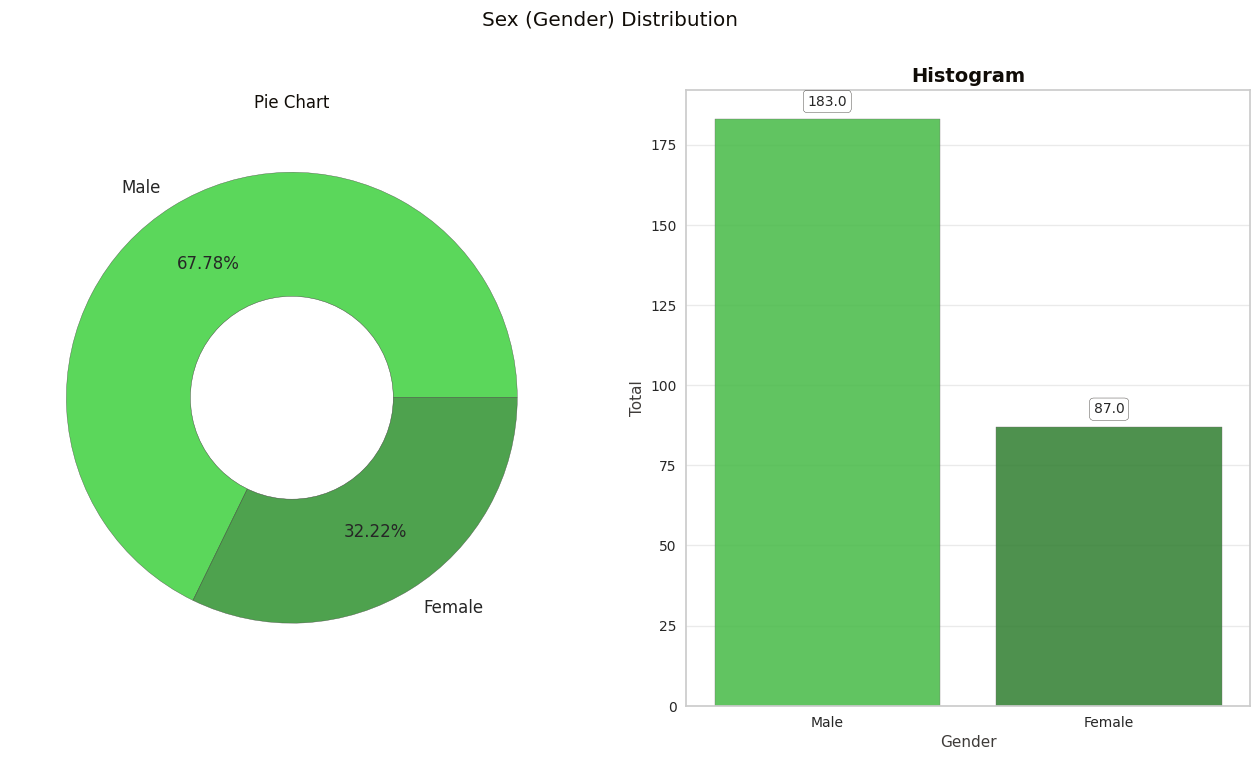

In [ ]:
colors=green_grad[1:3]
labels=['Male', 'Female']
order=df['Sex'].value_counts().index


plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', color=black_grad[0])


plt.subplot(1, 2, 1)
plt.title('Pie Chart',  color=black_grad[0])
plt.pie(df['Sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender',
           color=black_grad[1])
plt.ylabel('Total',
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


<Axes: title={'center': 'Histogram'}, xlabel='dataset', ylabel='Level'>

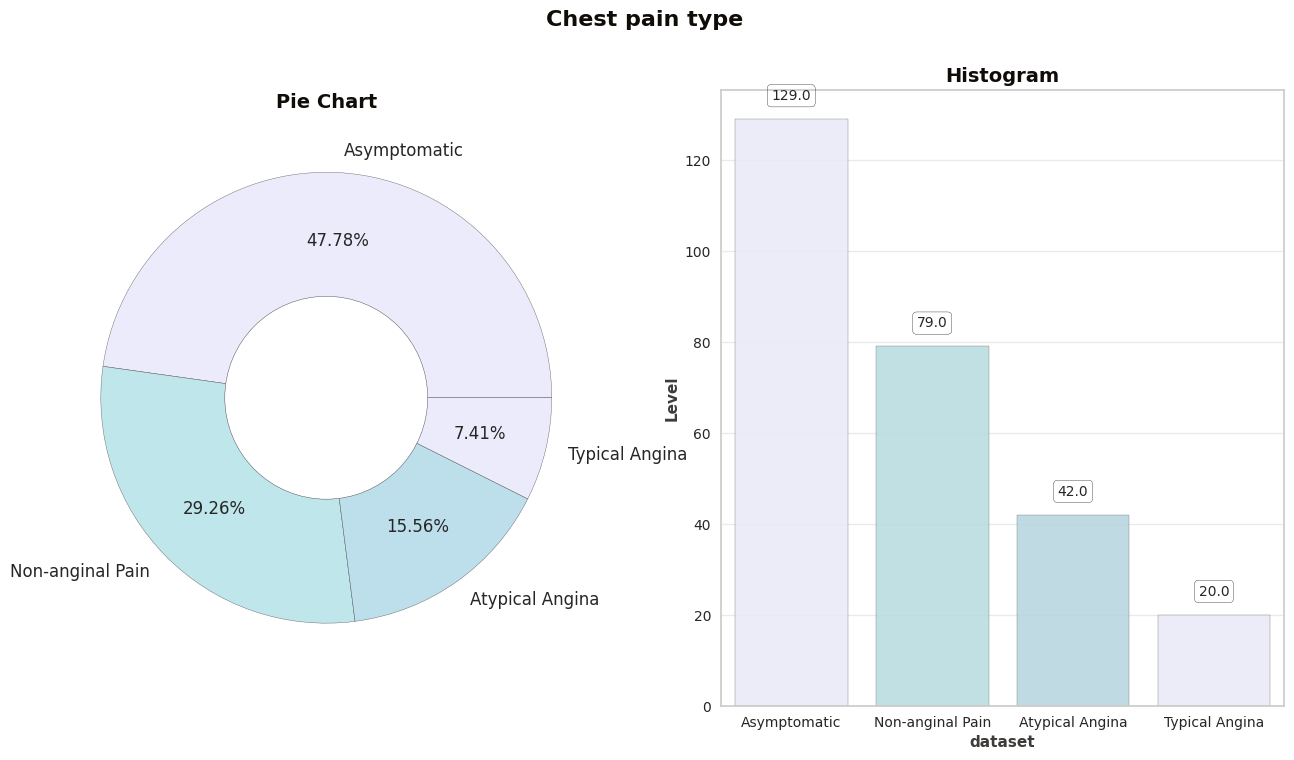

In [ ]:
colors=blue_grad[1:4]
labels=['Asymptomatic', 'Non-anginal Pain', 'Atypical Angina', 'Typical Angina']
order=df['Chest pain type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest pain type', fontweight='heavy',
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Chest pain type'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Chest pain type', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('dataset', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt



<Axes: title={'center': 'Histogram'}, xlabel='Fasting Blood Sugar', ylabel='Level'>

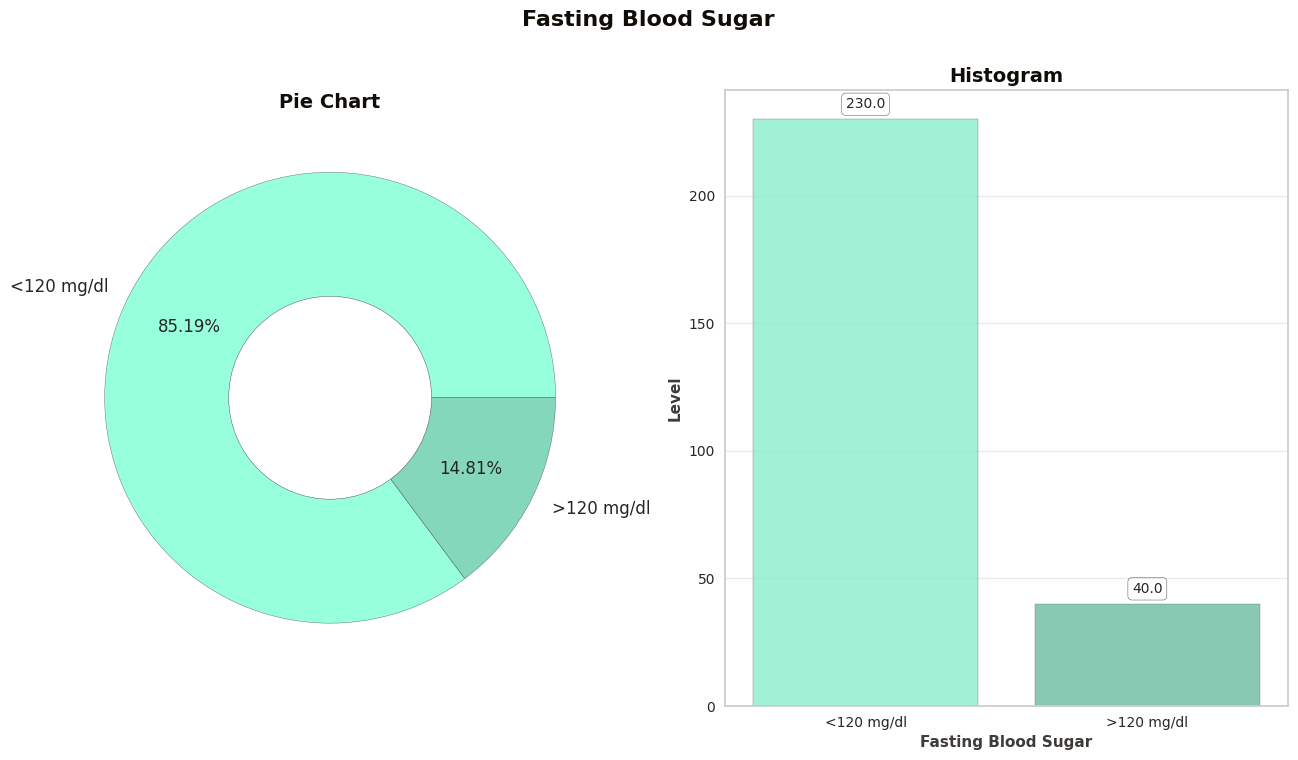

In [ ]:
colors=cyan_grad[1:4]
labels=['<120 mg/dl', '>120 mg/dl']
order=df['FBS over 120'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar', fontweight='heavy',
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['FBS over 120'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='FBS over 120', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


<Axes: title={'center': 'Histogram'}, xlabel='Electrocardiogram Results', ylabel='Level'>

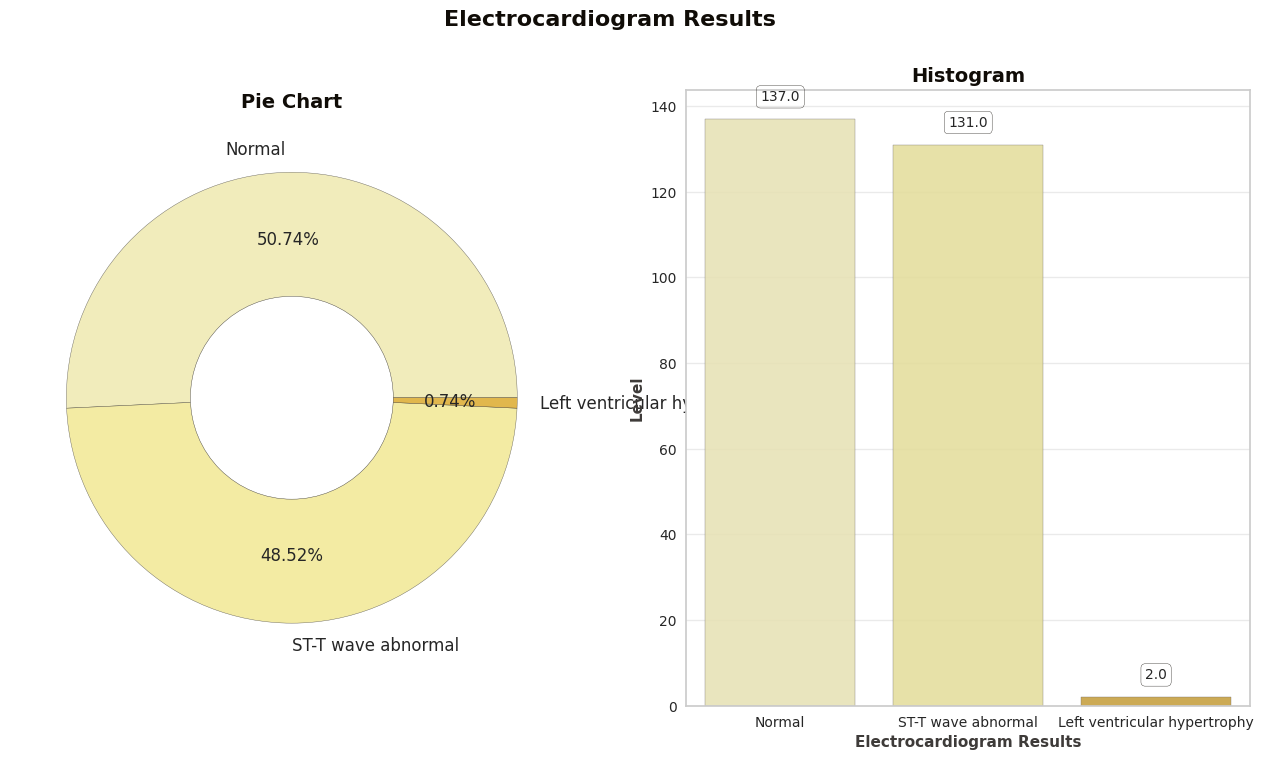

In [ ]:
colors=gold_grad[1:4]
labels=['Normal', 'ST-T wave abnormal', 'Left ventricular hypertrophy']
order=df['EKG results'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Electrocardiogram Results', fontweight='heavy',
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['EKG results'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='EKG results', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Electrocardiogram Results', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

<Axes: title={'center': 'Histogram'}, xlabel='Exercise Induced Angina Pectoris (AP)', ylabel='Level'>

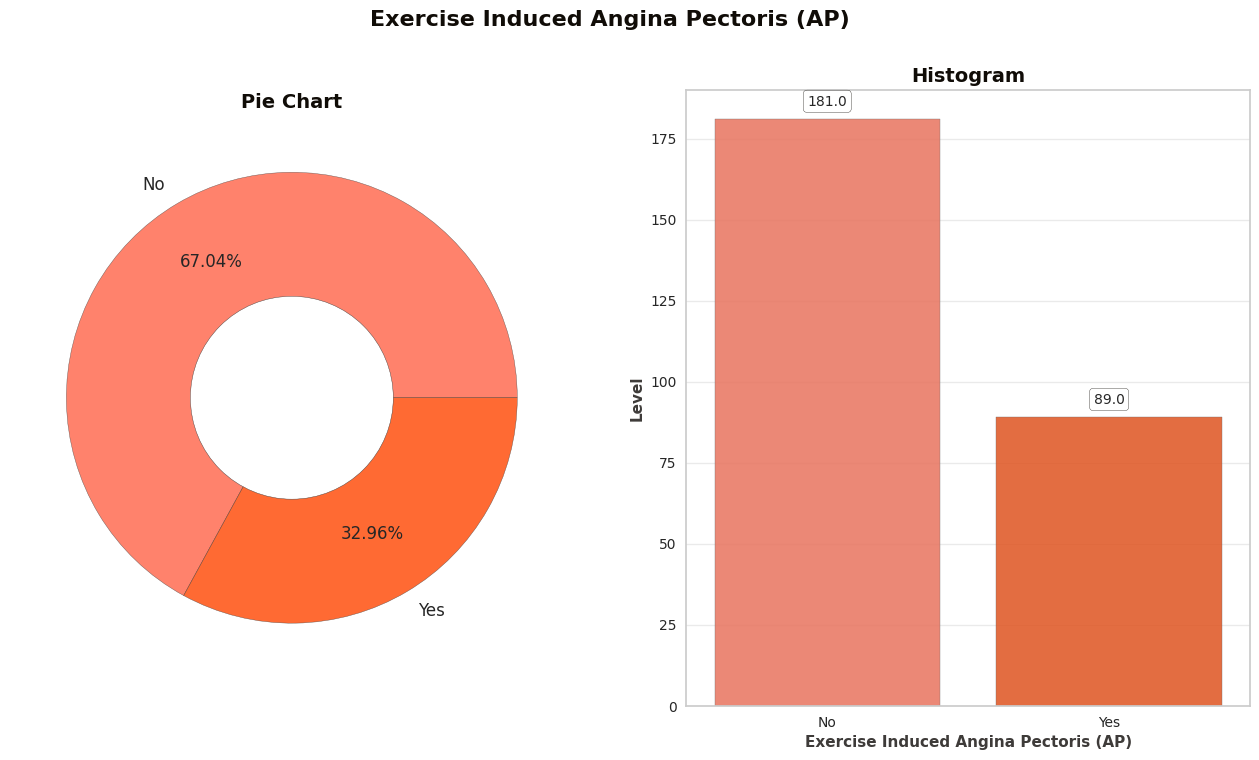

In [ ]:
colors=coral_grad[1:4]
labels=['No', 'Yes']
order=df['Exercise angina'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Pectoris (AP)', fontweight='heavy',
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Exercise angina'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Exercise angina', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Exercise Induced Angina Pectoris (AP)', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


<Axes: title={'center': 'Histogram'}, xlabel='slope', ylabel='Level'>

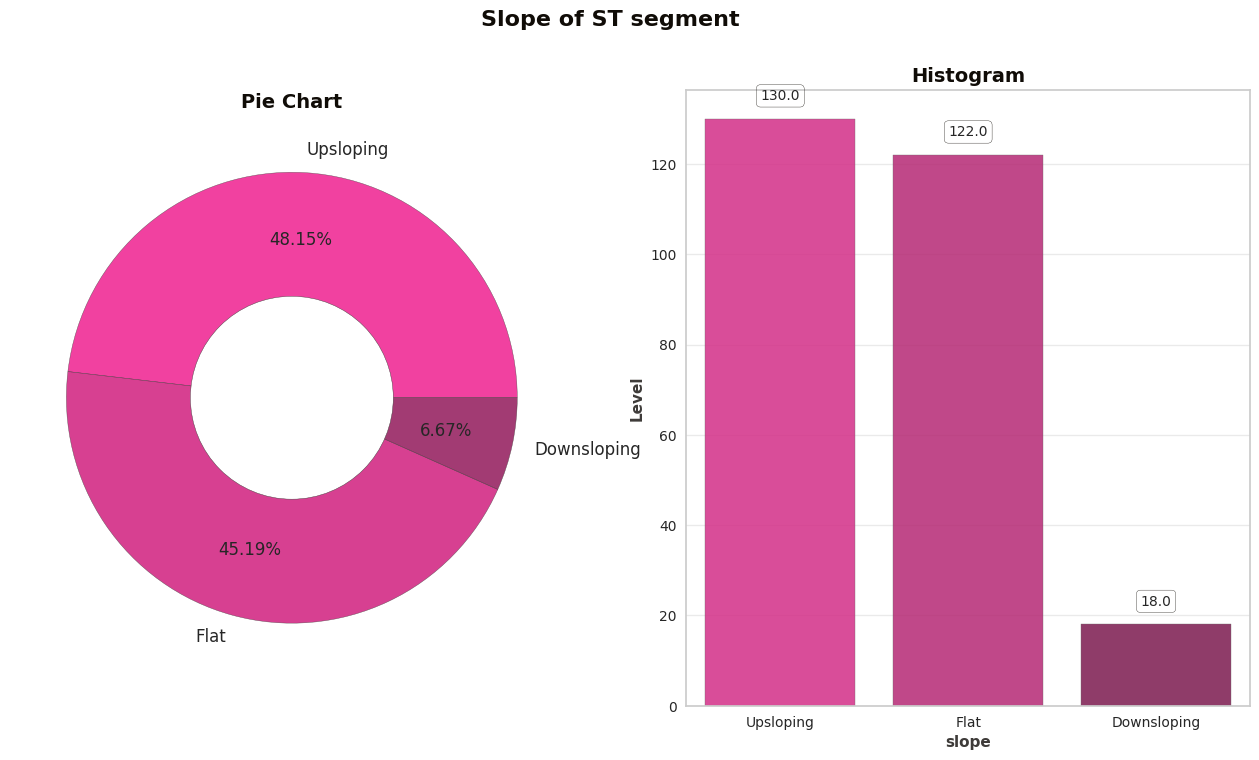

In [ ]:
colors=pink_grad[1:4]
labels=['Upsloping', 'Flat', 'Downsloping']
order=df['Slope of ST'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of ST segment', fontweight='heavy',
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Slope of ST'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Slope of ST', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('slope', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt


<Axes: title={'center': 'Histogram'}, xlabel='num', ylabel='Level'>

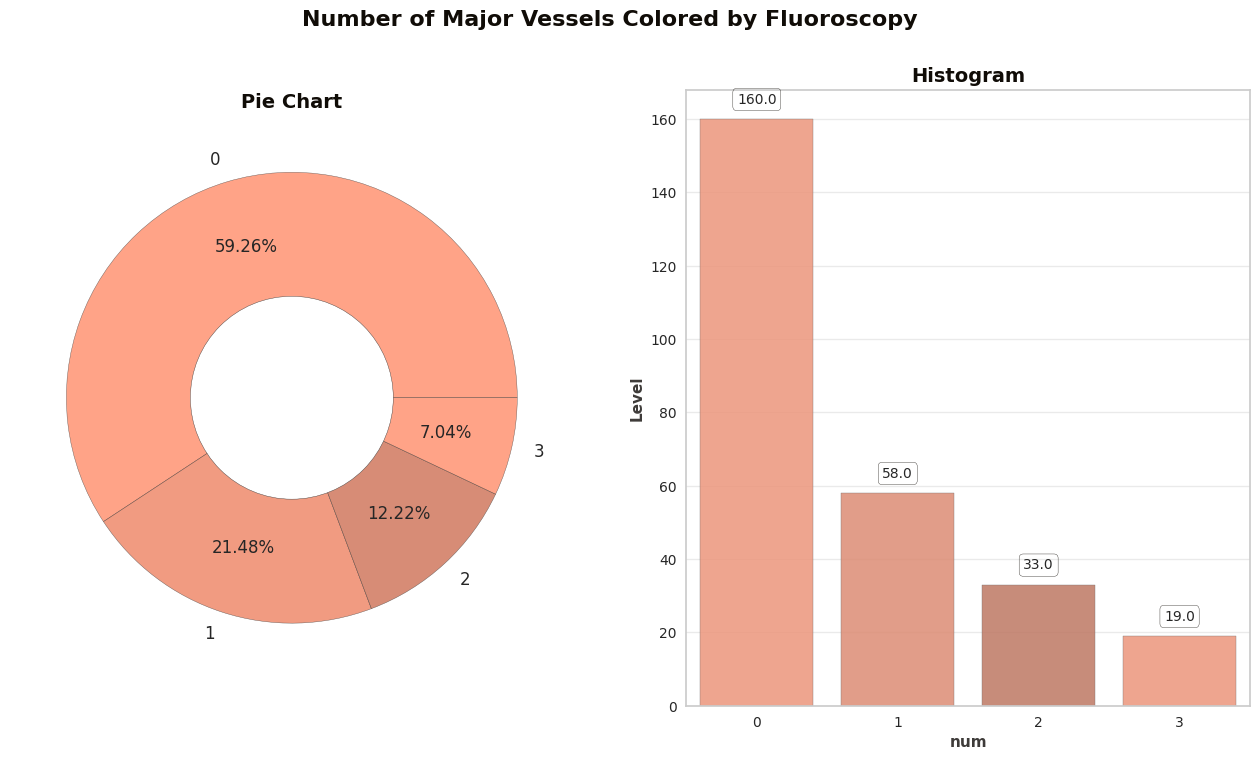

In [ ]:
colors=brown_grad[1:4]
labels=['0', '1', '2', '3']
order=df['Number of vessels fluro'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Colored by Fluoroscopy', fontweight='heavy',
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Number of vessels fluro'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Number of vessels fluro', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('num', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

<Axes: title={'center': 'Histogram'}, xlabel='Thallium Stress Test', ylabel='Level'>

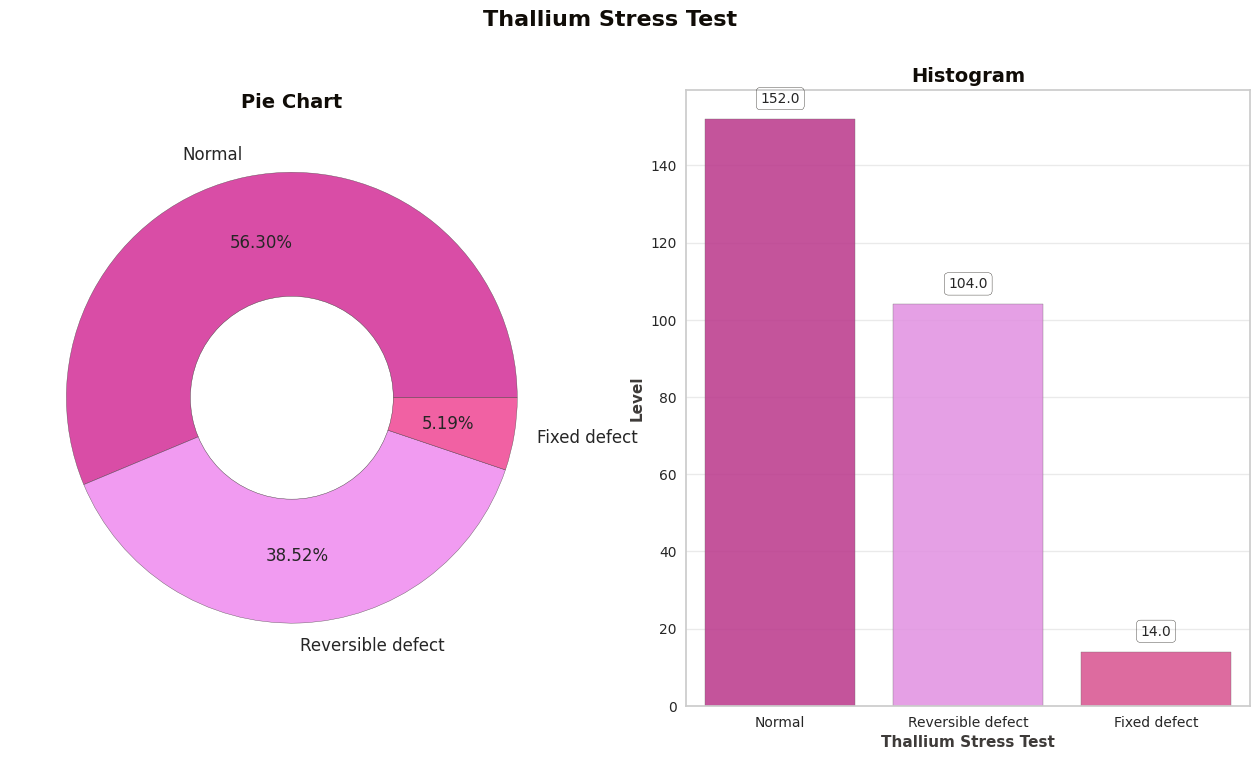

In [ ]:
colors=purple_grad[1:4]
labels=['Normal', 'Reversible defect', 'Fixed defect']
order=df['Thallium'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Thallium Stress Test', fontweight='heavy',
             fontsize='16', fontfamily='times new roman', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
plt.pie(df['Thallium'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[0])
ax = sns.countplot(x='Thallium', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Thallium Stress Test', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.ylabel('Level', fontweight='bold', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])
plt.xticks([0, 1, 2], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# **Rename**

In [ ]:
print(df.columns)


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [ ]:
df.rename(columns={'Heart Disease': 'Heart_Disease'}, inplace=True)

# **Describe**

In [ ]:
df.Heart_Disease[df.Heart_Disease == 'Presence'] = 1
df.Heart_Disease[df.Heart_Disease == 'Absence'] = 0
df['Heart_Disease']=df['Heart_Disease'].astype(int)

<ipython-input-385-10d82861102e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Heart_Disease[df.Heart_Disease == 'Presence'] = 1 #Target condition present. Heart disease (0 = no/absence/false, 1= yes/presence/true)
<ipython-input-385-10d82861102e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Heart_Disease[df.Heart_Disease == 'Absence'] = 0  #Target condition is absent


In [ ]:
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Age,270.000000,54.433333,9.109067,29.000000,48.000000,55.000000,61.000000,77.000000
Sex,270.000000,0.677778,0.468195,0.000000,0.000000,1.000000,1.000000,1.000000
Chest pain type,270.000000,3.174074,0.950090,1.000000,3.000000,3.000000,4.000000,4.000000
BP,270.000000,131.344444,17.861608,94.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,270.000000,249.659259,51.686237,126.000000,213.000000,245.000000,280.000000,564.000000
FBS over 120,270.000000,0.148148,0.355906,0.000000,0.000000,0.000000,0.000000,1.000000
EKG results,270.000000,1.022222,0.997891,0.000000,0.000000,2.000000,2.000000,2.000000
Max HR,270.000000,149.677778,23.165717,71.000000,133.000000,153.500000,166.000000,202.000000
Exercise angina,270.000000,0.329630,0.470952,0.000000,0.000000,0.000000,1.000000,1.000000
ST depression,270.000000,1.050000,1.145210,0.000000,0.000000,0.800000,1.600000,6.200000


# **Visualization**

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.164
Kurtosis: -0.545




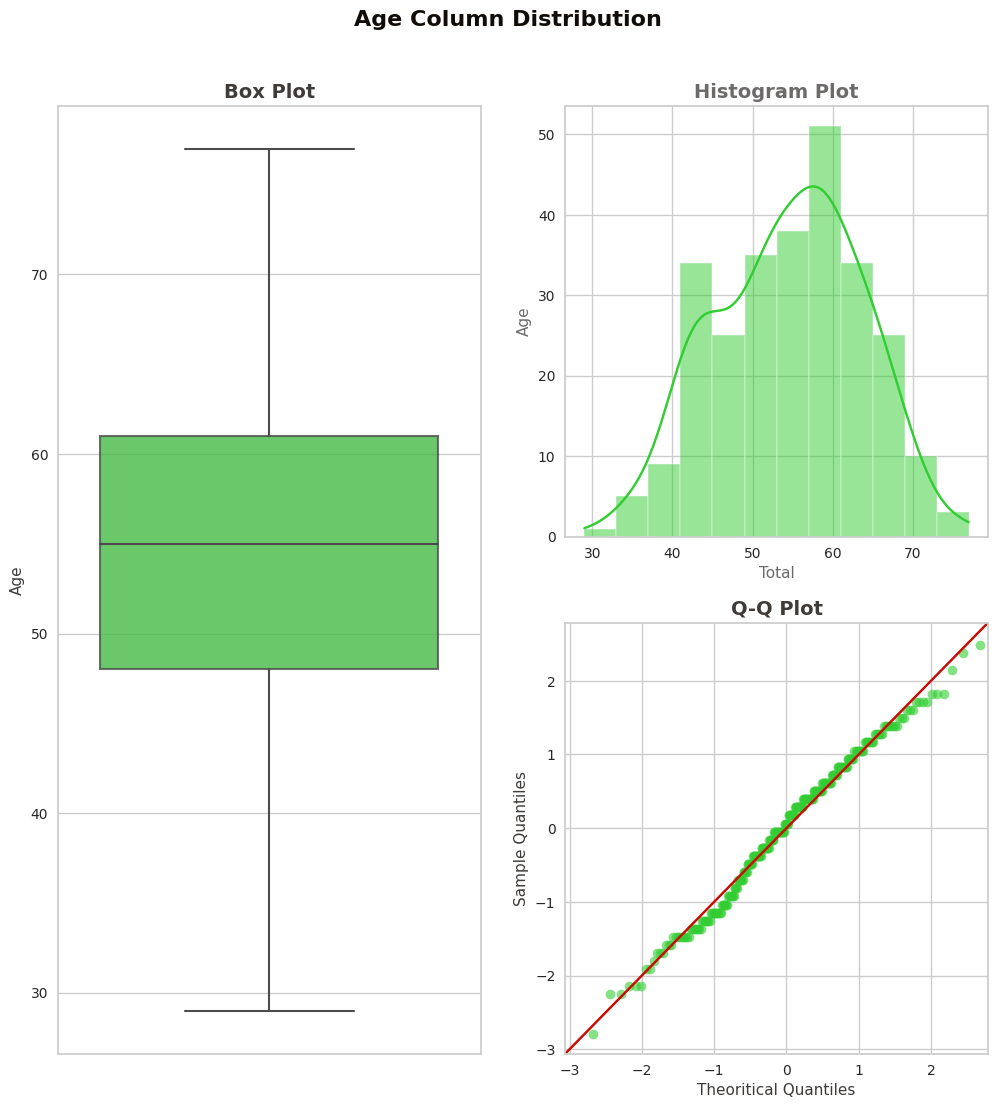

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'Age'
color = green_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16,
             fontfamily='times new roman', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[2])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[2])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman',
           color=black_grad[2])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman',
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])

plt.show()



.: Blood Pressure Skewness & Kurtosis :.
****************************************
Skewness: 0.723
Kurtosis: 0.923




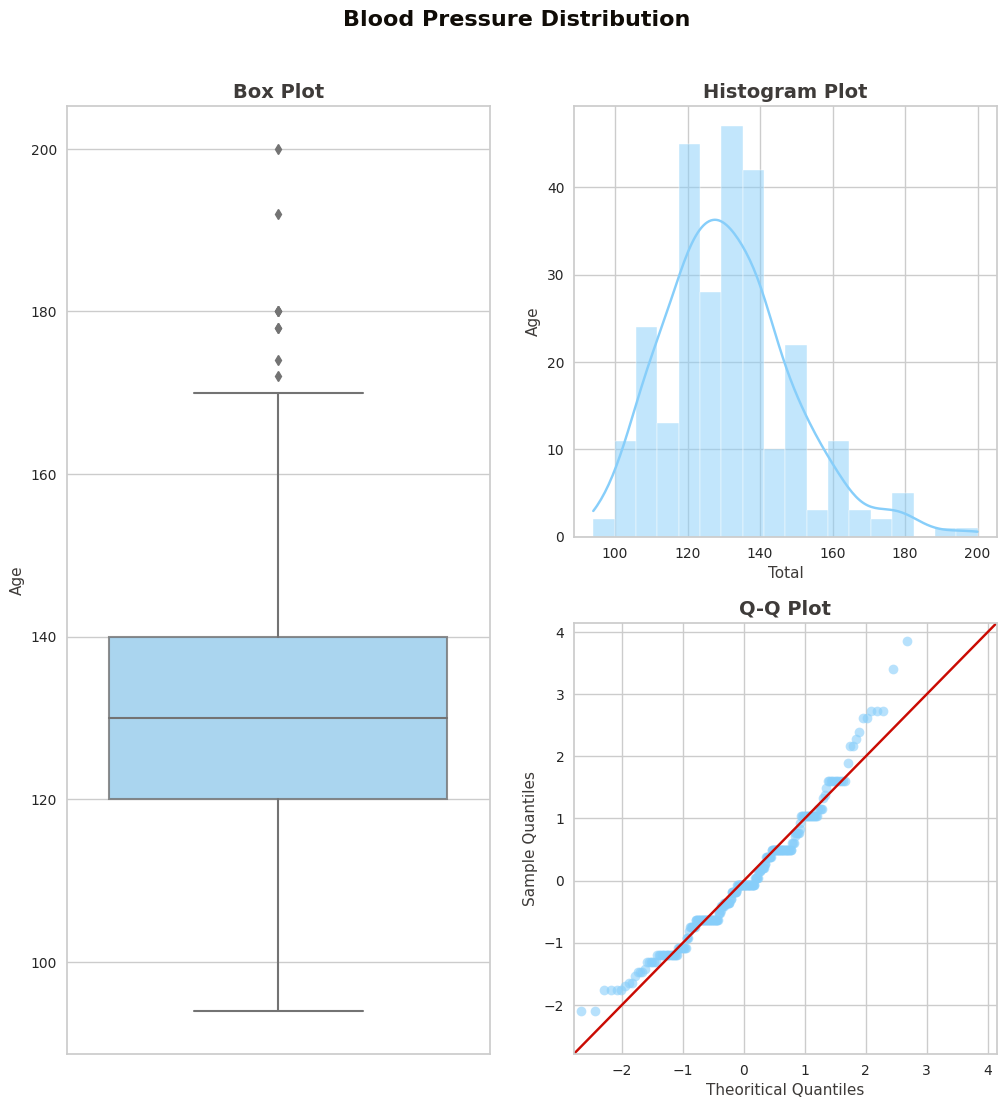

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'BP'
color = blue_grad[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Blood Pressure Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Blood Pressure Distribution', fontweight='bold', fontsize=16,
             fontfamily='times new roman', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman',
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])

plt.show()

.: Cholesterol Skewness & Kurtosis :.
****************************************
Skewness: 1.184
Kurtosis: 4.896




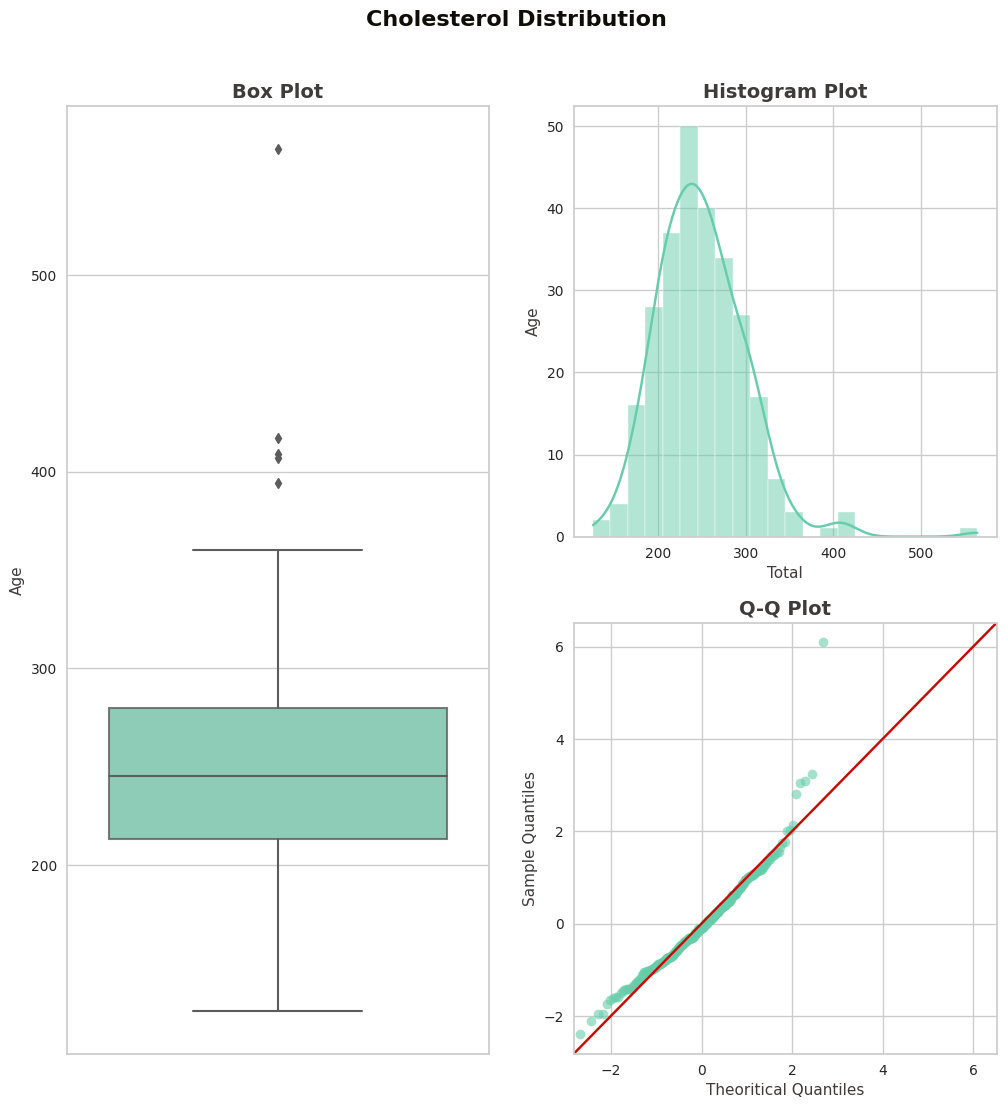

In [ ]:
# --- Variable, Color & Plot Size ---
var = 'Cholesterol'
color = cyan_grad[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Cholesterol Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Cholesterol Distribution', fontweight='bold', fontsize=16,
             fontfamily='times new roman', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14,
          fontfamily='times new roman', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='times new roman', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman',
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='times new roman',
           color=black_grad[1])

plt.show()

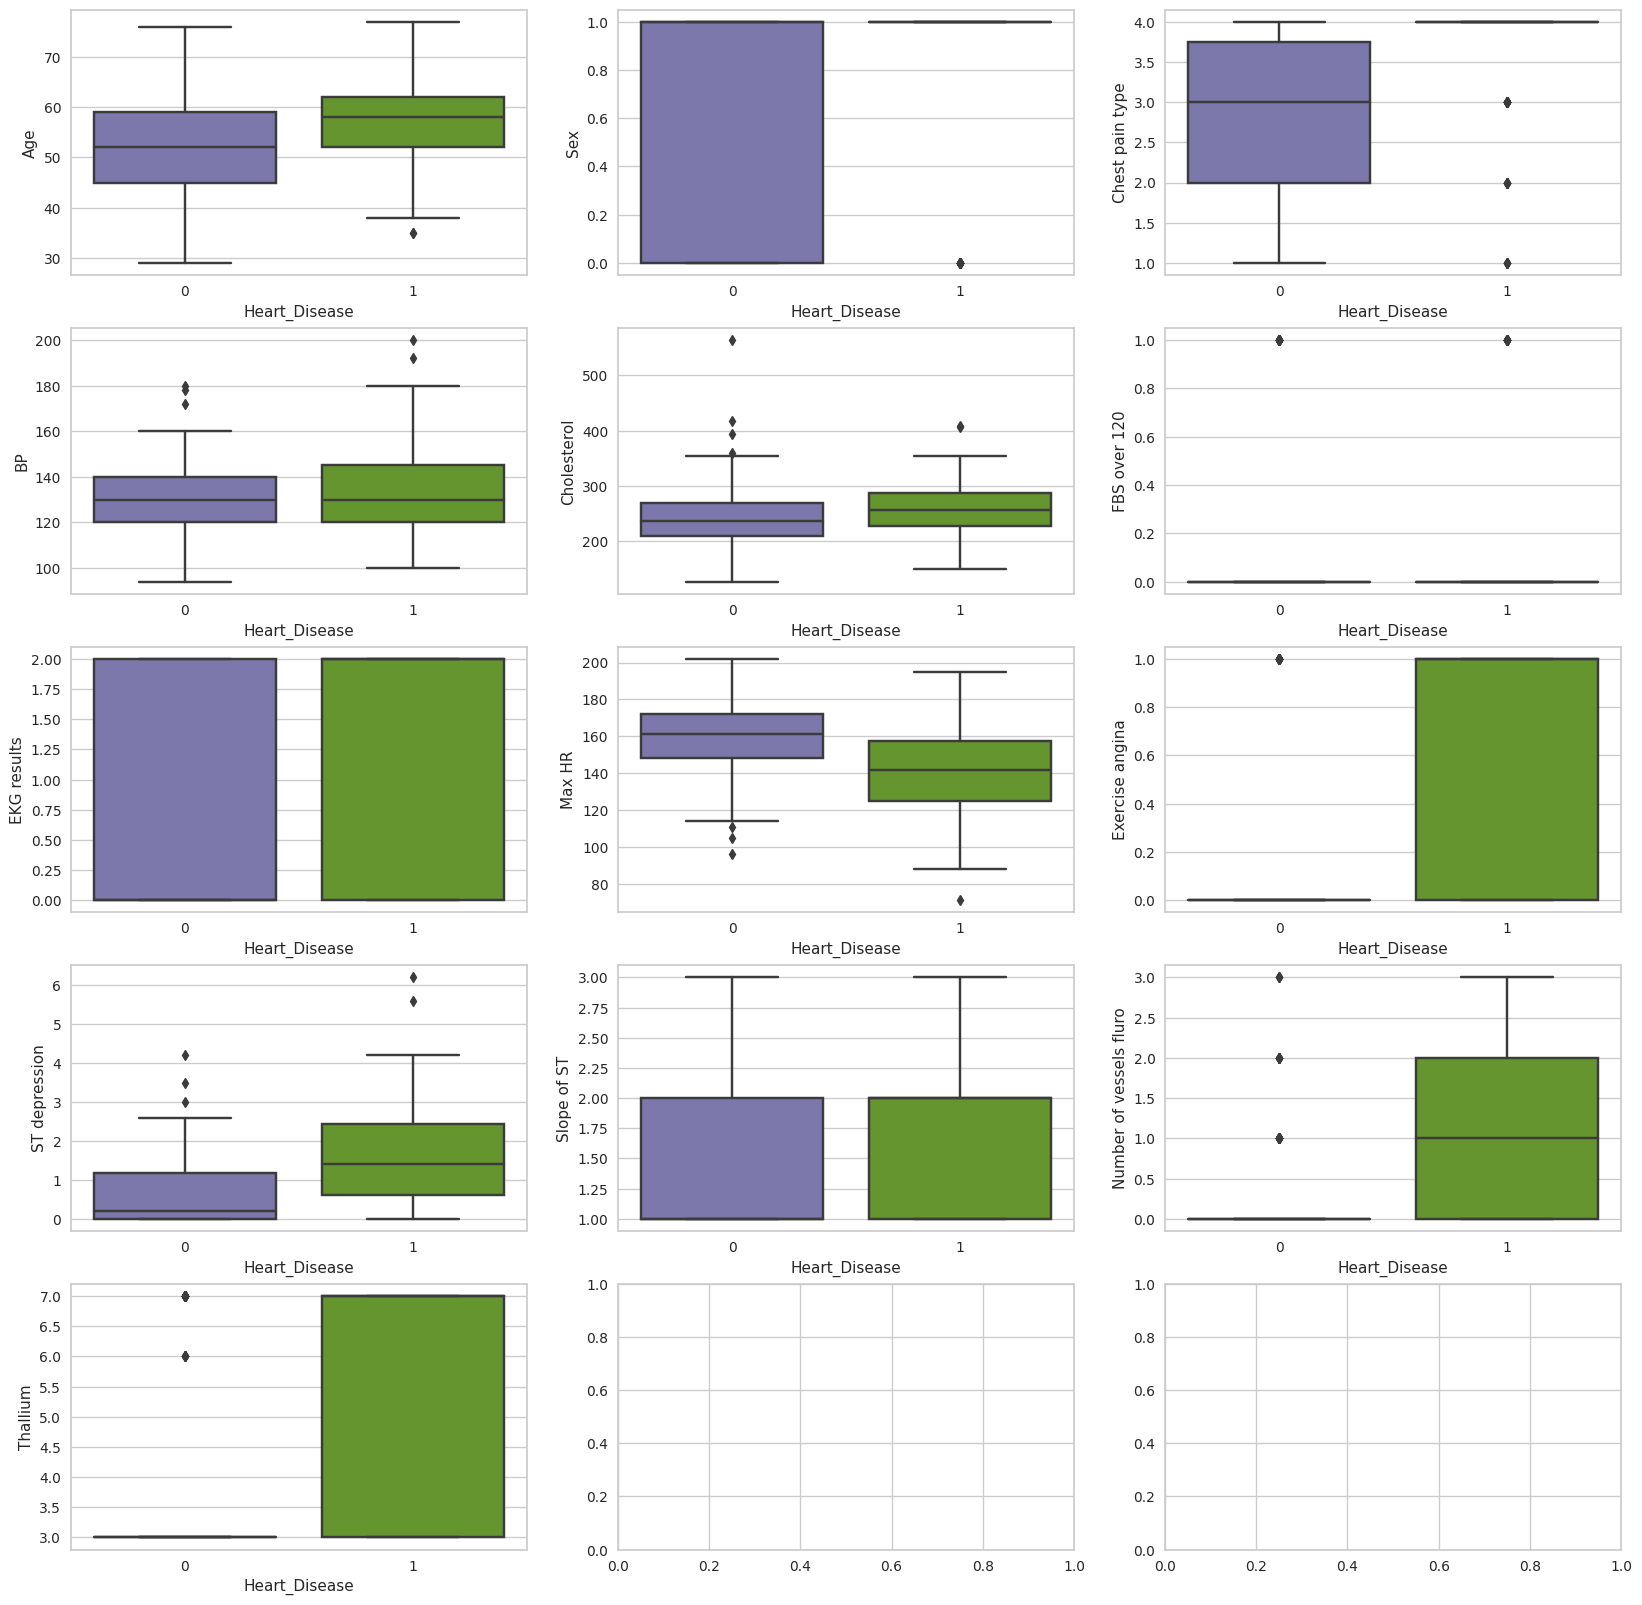

In [ ]:

fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))
index = 0
for col in df.columns[:-1]:
    sns.boxplot(x='Heart_Disease', y=col, data=df, ax=ax[index//3][index%3])
    index += 1


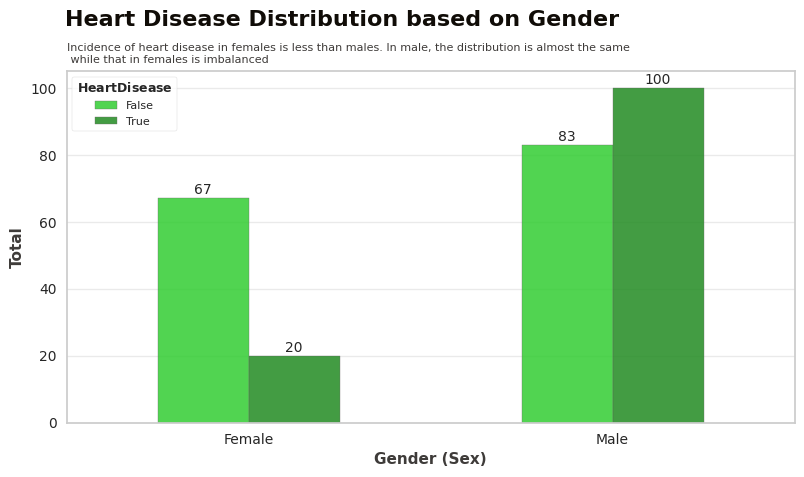

In [ ]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.Sex, df.Heart_Disease).plot(kind='bar', figsize=(8, 5),
                                         color=green_grad[1:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+1.25,rect.get_height(),
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy',
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='times new roman',
             color=black_grad[0])
plt.title('Incidence of heart disease in females is less than males. In male, the distribution is almost the same\n while that in females is imbalanced',
          fontsize='8', fontfamily='times new roman', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='times new roman', fontweight='bold',
           color=black_grad[1])
plt.ylabel('Total', fontfamily='times new roman', fontweight='bold',
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Heart Disease}$', fontsize='8',
           title_fontsize='9', loc='upper left', frameon=True);

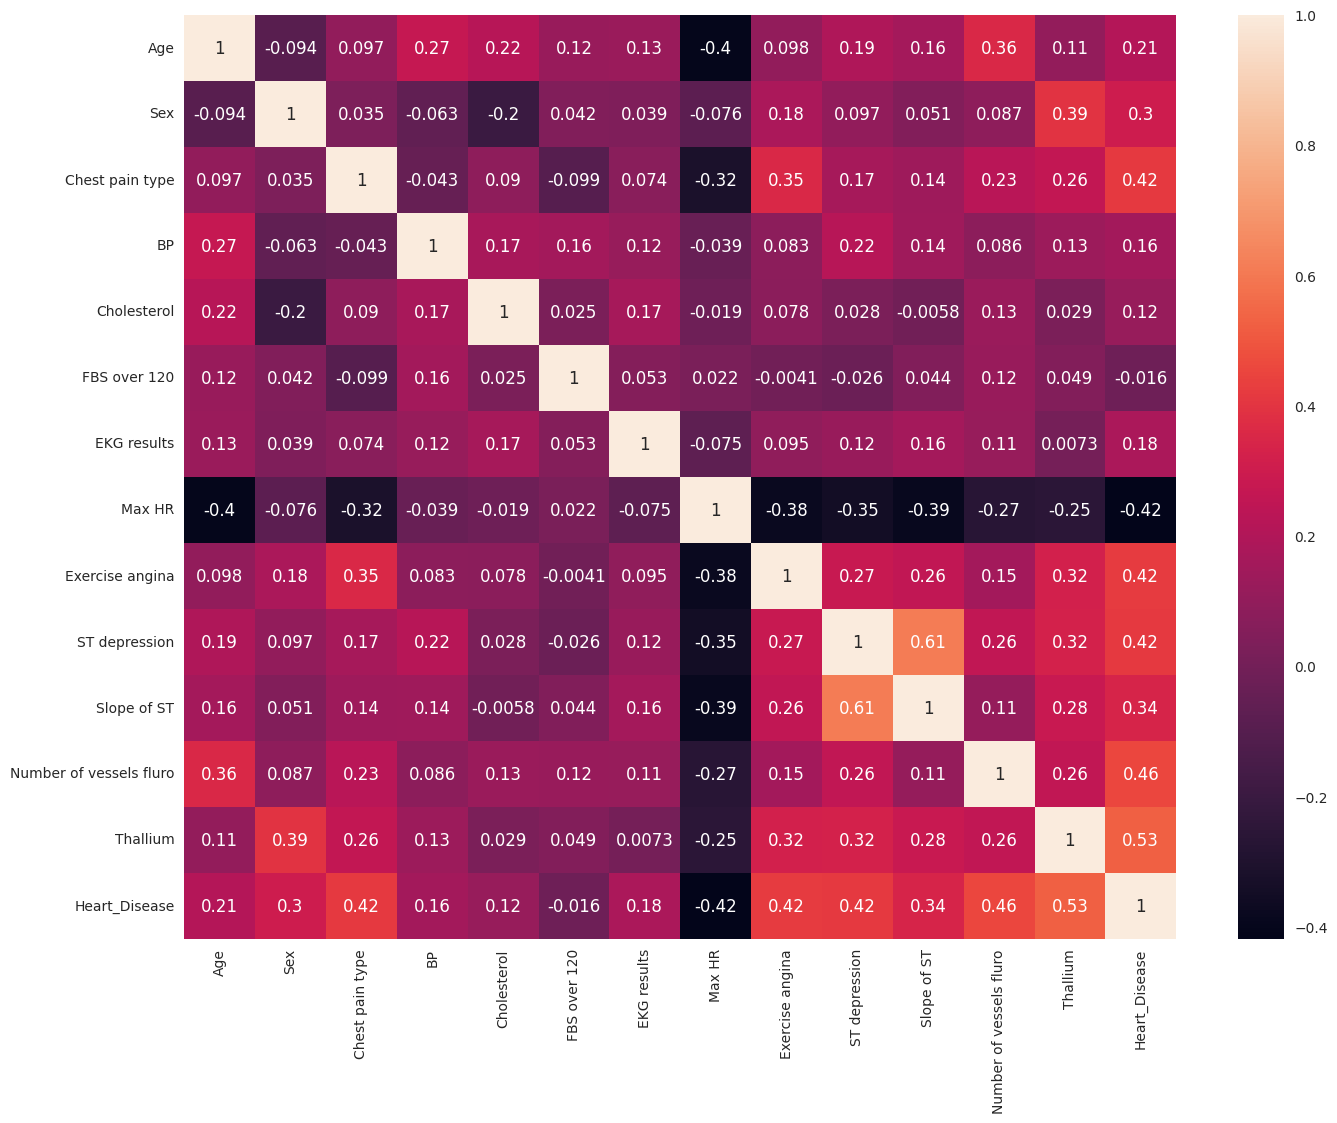

In [ ]:
plt.figure(figsize=(16,12))  # set the size of the heatmap

sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
cp = pd.get_dummies(df['Chest pain type'], prefix='cp')
thal = pd.get_dummies(df['Thallium'], prefix='thal')
slope = pd.get_dummies(df['Slope of ST'], prefix='slope')


frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)


In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,70,1,4,130,322,0,2,109,0,2.4,...,0,0,0,1,1,0,0,0,1,0
1,67,0,3,115,564,0,2,160,0,1.6,...,0,0,1,0,0,0,1,0,1,0
2,57,1,2,124,261,0,0,141,0,0.3,...,0,1,0,0,0,0,1,1,0,0
3,64,1,4,128,263,0,0,105,1,0.2,...,0,0,0,1,0,0,1,0,1,0
4,74,0,2,120,269,0,2,121,1,0.2,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
df = df.drop(columns = ['Chest pain type', 'Thallium', 'Slope of ST'])

In [ ]:
df.head()


,Age,Sex,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Number of vessels fluro,...,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,70,1,130,322,0,2,109,0,2.4,3,...,0,0,0,1,1,0,0,0,1,0
1,67,0,115,564,0,2,160,0,1.6,0,...,0,0,1,0,0,0,1,0,1,0
2,57,1,124,261,0,0,141,0,0.3,0,...,0,1,0,0,0,0,1,1,0,0
3,64,1,128,263,0,0,105,1,0.2,1,...,0,0,0,1,0,0,1,0,1,0
4,74,0,120,269,0,2,121,1,0.2,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
# --- Seperating Dependent Features ---
x = df.drop(['Heart_Disease'], axis=1)
y = df['Heart_Disease']

In [ ]:
# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)

In [ ]:
# --- Splitting Dataset into 70:30 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [ ]:
# --- Applying Logistic Regression ---
LRclassifier = LogisticRegression(max_iter=1500, random_state=None, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)
y_pred_LR = LRclassifier.predict(x_test)

.:. Logistic Regression Accuracy: 83.95% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.85      0.82      0.84        40

    accuracy                           0.84        81
   macro avg       0.84      0.84      0.84        81
weighted avg       0.84      0.84      0.84        81


.: Performance Evaluation
**************************


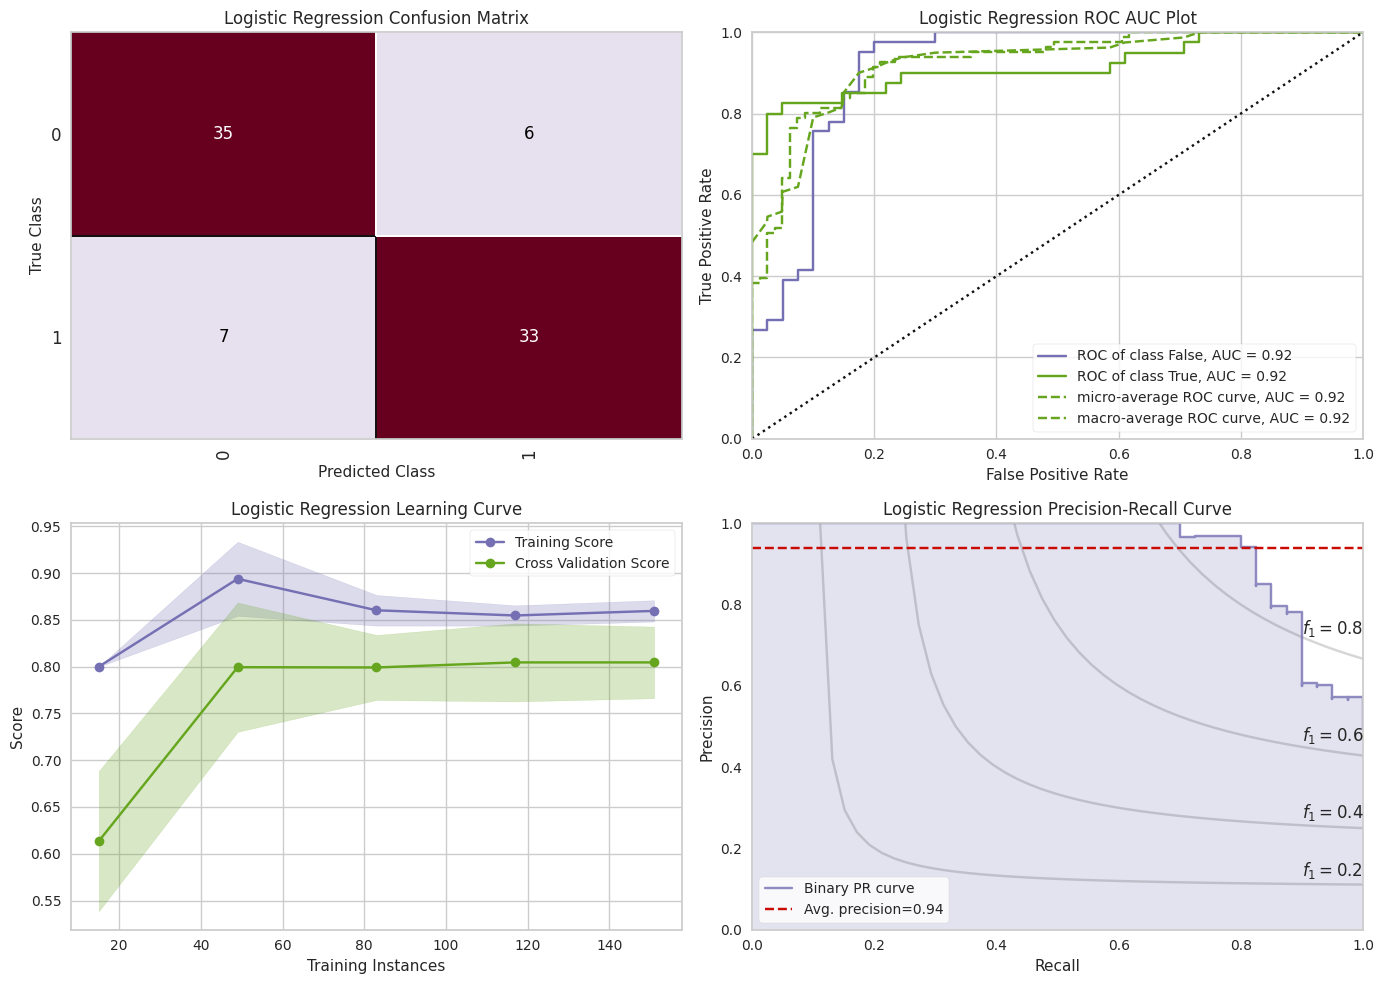

In [ ]:
# --- LR Accuracy ---
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

# --- LR Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- LR Confusion Matrix ---
logmatrix = ConfusionMatrix(LRclassifier, ax=ax1, cmap='PuRd',
                            title='Logistic Regression Confusion Matrix')
logmatrix.fit(x_train, y_train)
logmatrix.score(x_test, y_test)
logmatrix.finalize()

# --- LR ROC AUC ---
logrocauc = ROCAUC(LRclassifier, classes=['False', 'True'], ax=ax2,
                   title='Logistic Regression ROC AUC Plot')
logrocauc.fit(x_train, y_train)
logrocauc.score(x_test, y_test)
logrocauc.finalize()

# --- LR Learning Curve ---
loglc = LearningCurve(LRclassifier, ax=ax3, title='Logistic Regression Learning Curve')
loglc.fit(x_train, y_train)
loglc.finalize()

# --- LR Precision Recall Curve ---
logcurve = PrecisionRecallCurve(LRclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Logistic Regression Precision-Recall Curve')
logcurve.fit(x_train, y_train)
logcurve.score(x_test, y_test)
logcurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying KNN ---
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

.:. K-Nearest Neighbour Accuracy: 74.07% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        41
           1       0.73      0.75      0.74        40

    accuracy                           0.74        81
   macro avg       0.74      0.74      0.74        81
weighted avg       0.74      0.74      0.74        81


.: Performance Evaluation
**************************


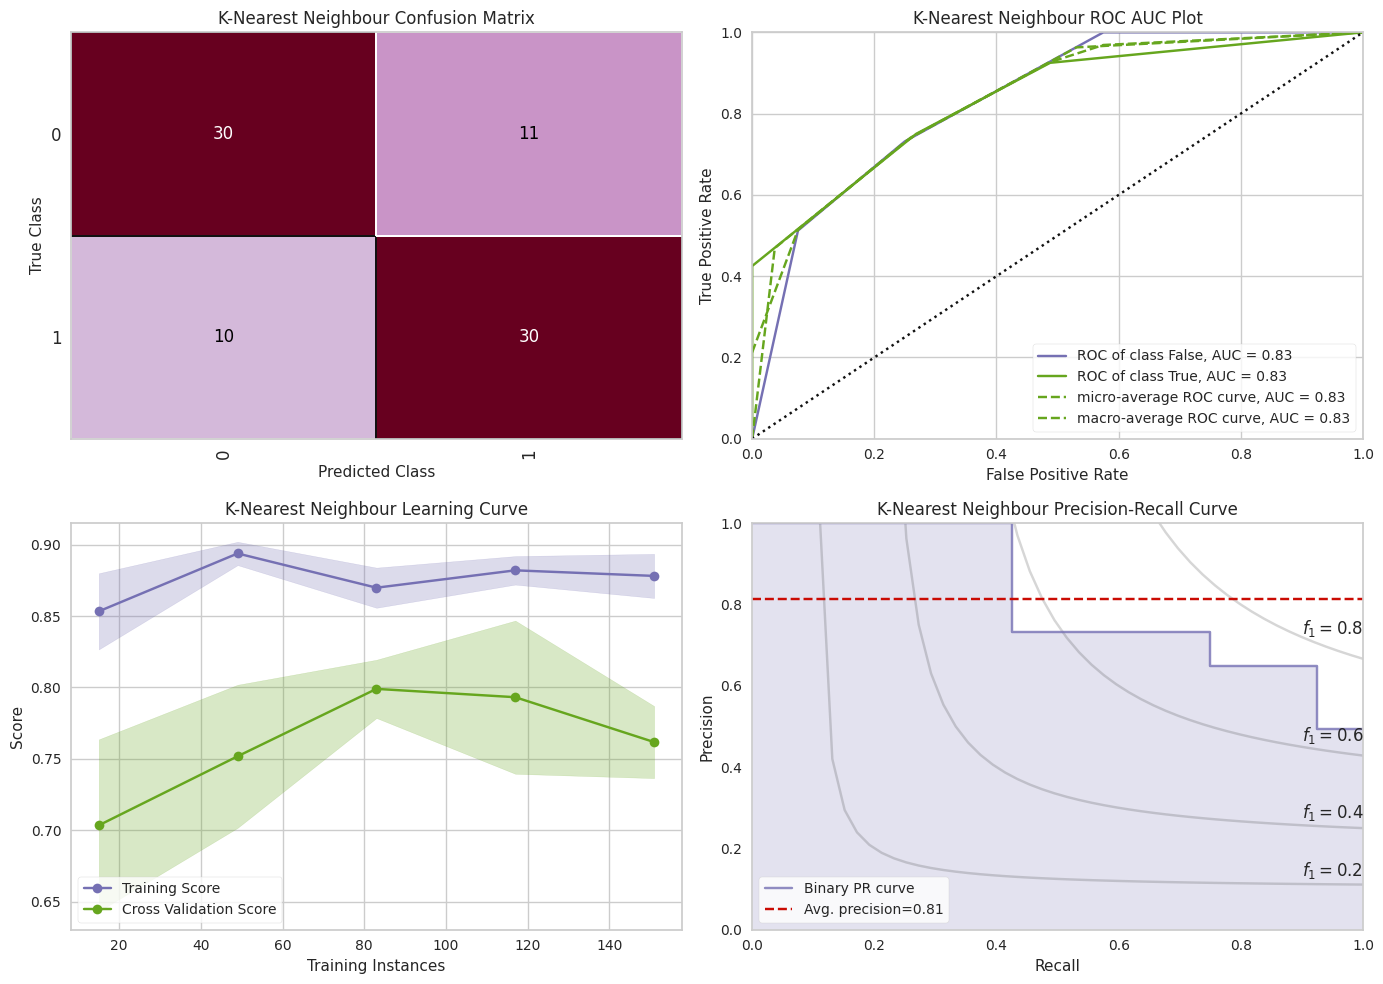

In [ ]:
# --- KNN Accuracy ---
KNNAcc = accuracy_score(y_pred_KNN, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(KNNAcc*100)+' .:.')

# --- KNN Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_KNN))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(KNNClassifier, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# --- KNN ROC AUC ---
knnrocauc = ROCAUC(KNNClassifier, classes=['False', 'True'], ax=ax2,
                   title='K-Nearest Neighbour ROC AUC Plot')
knnrocauc.fit(x_train, y_train)
knnrocauc.score(x_test, y_test)
knnrocauc.finalize()

# --- KNN Learning Curve ---
knnlc = LearningCurve(KNNClassifier, ax=ax3, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(x_train, y_train)
knnlc.finalize()

# --- KNN Precision Recall Curve ---
knncurve = PrecisionRecallCurve(KNNClassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                 title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(x_train, y_train)
knncurve.score(x_test, y_test)
knncurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying SVM ---
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


.:. Support Vector Machine Accuracy: 86.42% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.87      0.85      0.86        40

    accuracy                           0.86        81
   macro avg       0.86      0.86      0.86        81
weighted avg       0.86      0.86      0.86        81


.: Performance Evaluation
**************************


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider

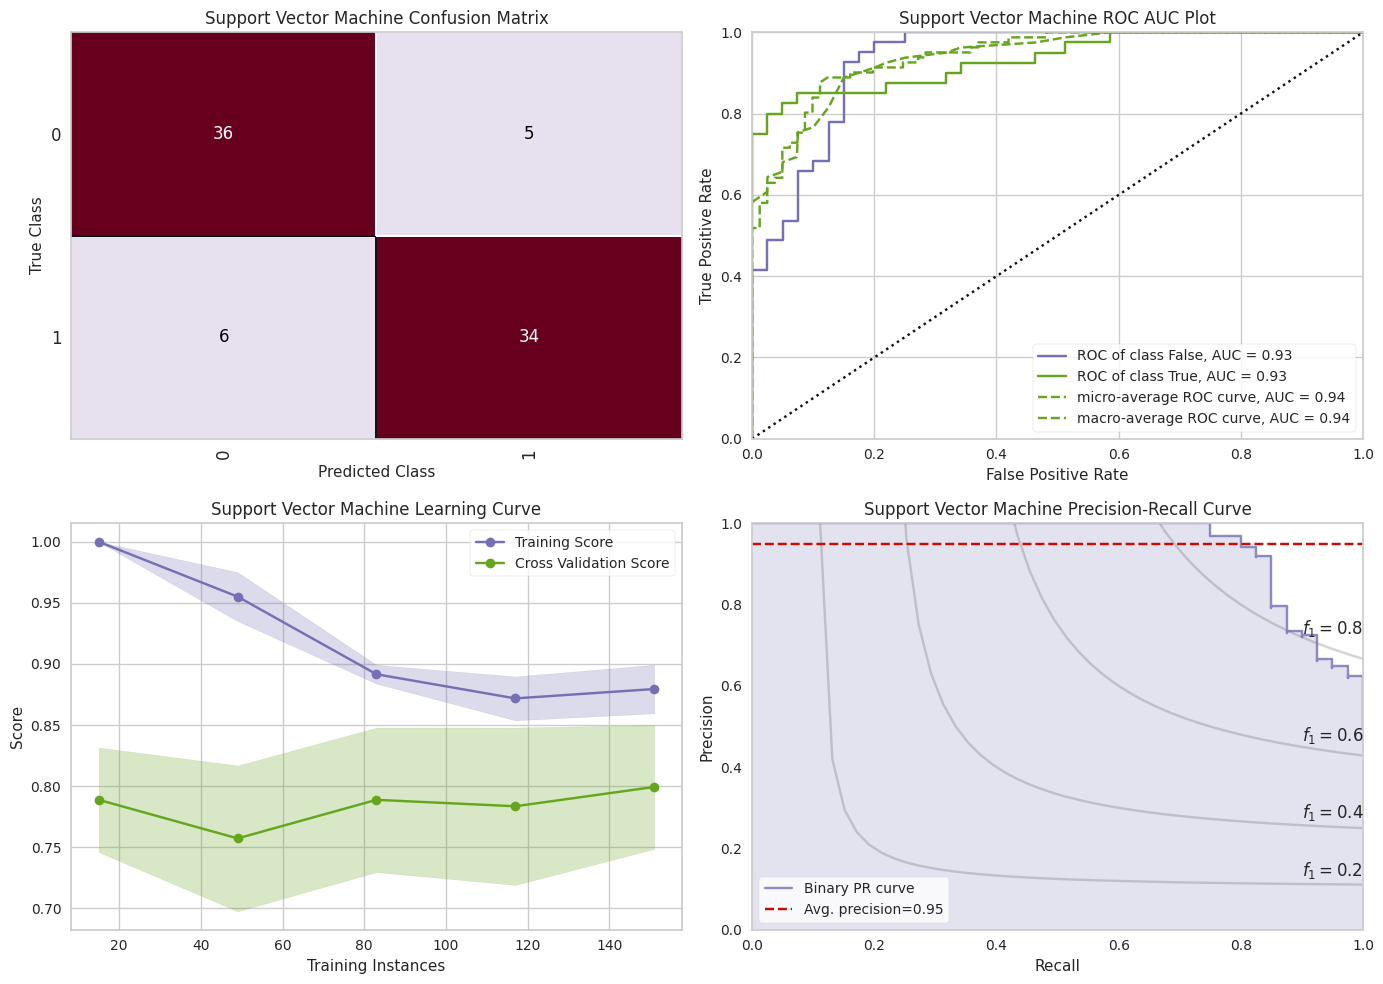

In [ ]:
# --- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_SVM))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- SVM Confusion Matrix ---
svmmatrix = ConfusionMatrix(SVMclassifier, ax=ax1, cmap='PuRd',
                            title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(x_train, y_train)
svmmatrix.score(x_test, y_test)
svmmatrix.finalize()

# --- SVM ROC AUC ---
svmrocauc = ROCAUC(SVMclassifier, classes=['False', 'True'], ax=ax2,
                   title='Support Vector Machine ROC AUC Plot')
svmrocauc.fit(x_train, y_train)
svmrocauc.score(x_test, y_test)
svmrocauc.finalize()

# --- SVM Learning Curve ---
svmlc = LearningCurve(SVMclassifier, ax=ax3, title='Support Vector Machine Learning Curve')
svmlc.fit(x_train, y_train)
svmlc.finalize()

# --- SVM Precision Recall Curve ---
svmcurve = PrecisionRecallCurve(SVMclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(x_train, y_train)
svmcurve.score(x_test, y_test)
svmcurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying Gaussian NB ---
GNBclassifier = GaussianNB(var_smoothing=0.1)
GNBclassifier.fit(x_train, y_train)

y_pred_GNB = GNBclassifier.predict(x_test)

.:. Gaussian Naive Bayes Accuracy: 85.19% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.82      0.90      0.86        40

    accuracy                           0.85        81
   macro avg       0.86      0.85      0.85        81
weighted avg       0.86      0.85      0.85        81


.: Performance Evaluation
**************************


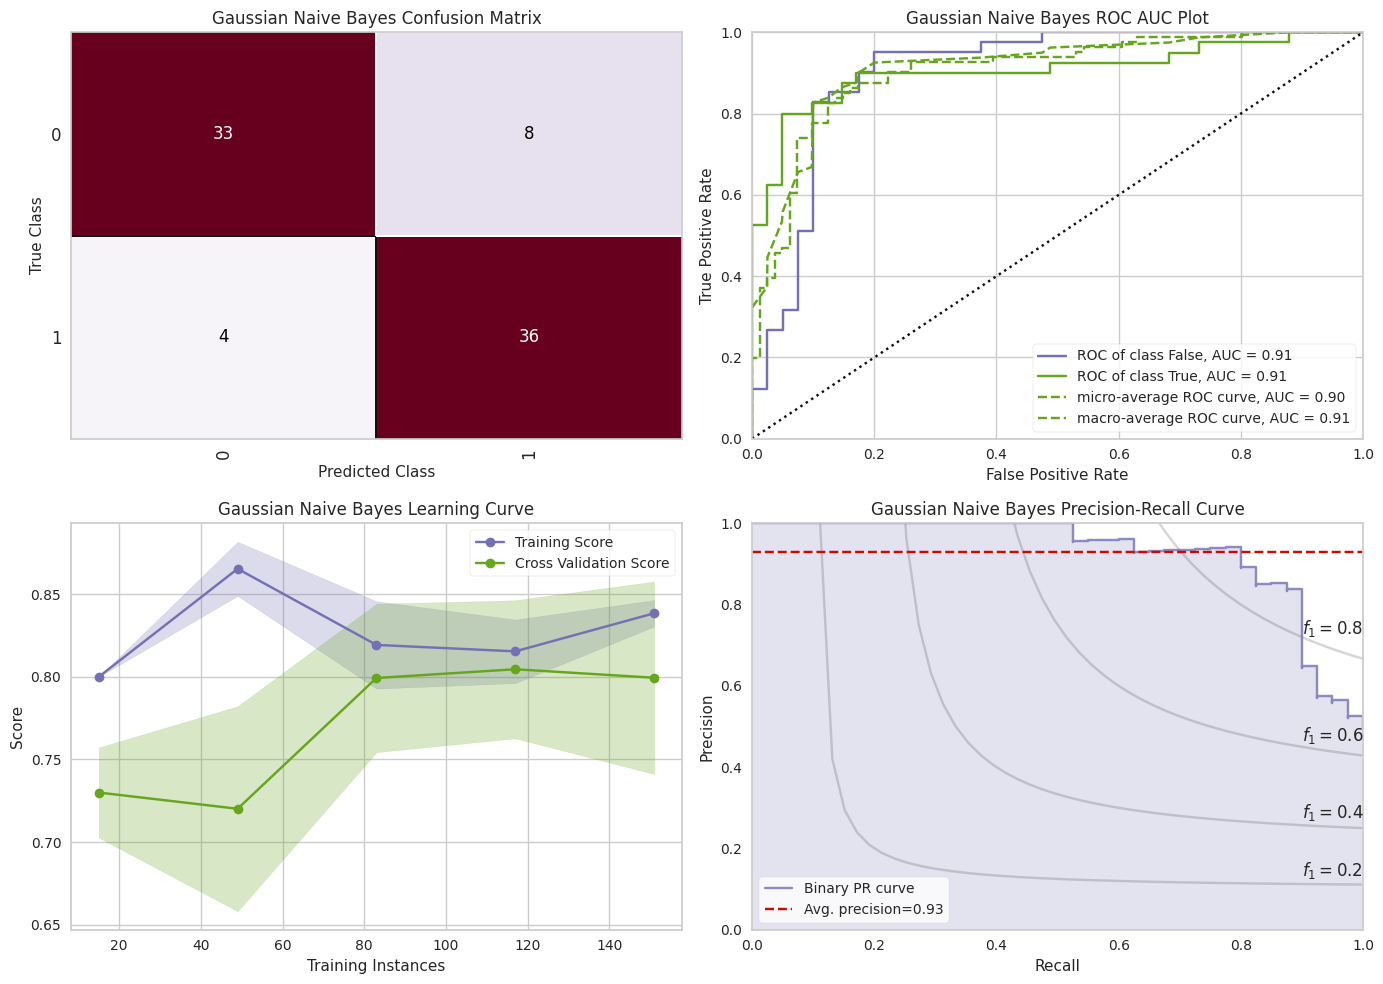

In [ ]:
# --- GNB Accuracy ---
GNBAcc = accuracy_score(y_pred_GNB, y_test)
print('.:. Gaussian Naive Bayes Accuracy:'+'\033[1m {:.2f}%'.format(GNBAcc*100)+' .:.')

# --- GNB Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GNB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- GNB Confusion Matrix ---
gnbmatrix = ConfusionMatrix(GNBclassifier, ax=ax1, cmap='PuRd',
                            title='Gaussian Naive Bayes Confusion Matrix')
gnbmatrix.fit(x_train, y_train)
gnbmatrix.score(x_test, y_test)
gnbmatrix.finalize()

# --- GNB ROC AUC ---
gnbrocauc = ROCAUC(GNBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gaussian Naive Bayes ROC AUC Plot')
gnbrocauc.fit(x_train, y_train)
gnbrocauc.score(x_test, y_test)
gnbrocauc.finalize()

# --- GNB Learning Curve ---
gnblc = LearningCurve(GNBclassifier, ax=ax3, title='Gaussian Naive Bayes Learning Curve')
gnblc.fit(x_train, y_train)
gnblc.finalize()

# --- GNB Precision Recall Curve ---
gnbcurve = PrecisionRecallCurve(GNBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gaussian Naive Bayes Precision-Recall Curve')
gnbcurve.fit(x_train, y_train)
gnbcurve.score(x_test, y_test)
gnbcurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying Decision Tree ---
DTCclassifier = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,
                                       splitter='random', random_state=1)

DTCclassifier.fit(x_train, y_train)
y_pred_DTC = DTCclassifier.predict(x_test)

.:. Decision Tree Accuracy: 71.60% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.76      0.63      0.69        41
           1       0.68      0.80      0.74        40

    accuracy                           0.72        81
   macro avg       0.72      0.72      0.71        81
weighted avg       0.72      0.72      0.71        81


.: Performance Evaluation
**************************


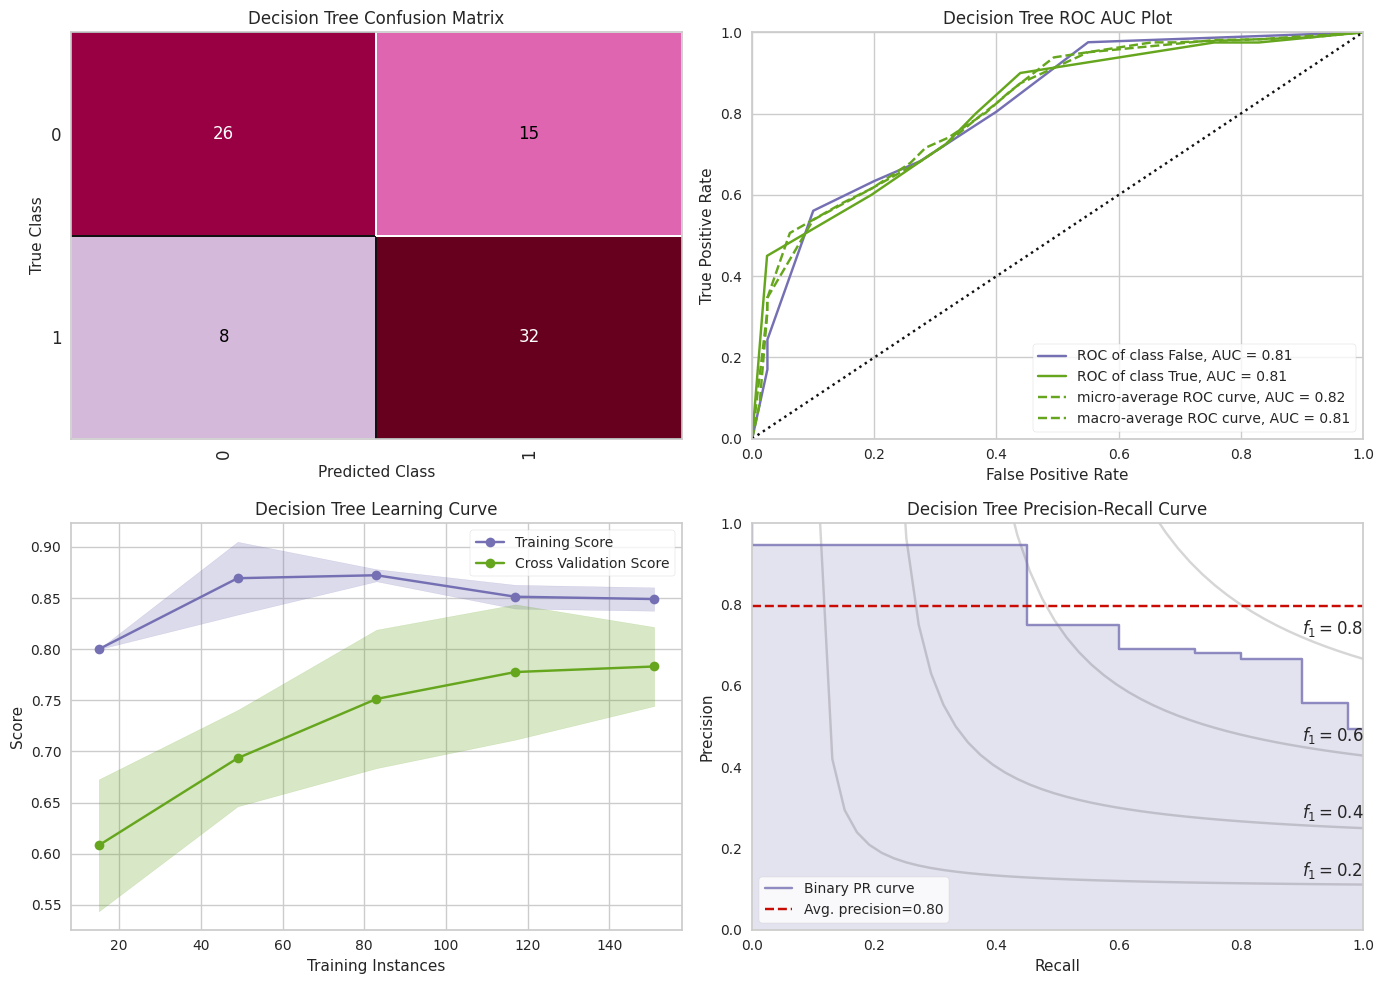

In [ ]:
# --- Decision Tree Accuracy ---
DTCAcc = accuracy_score(y_pred_DTC, y_test)
print('.:. Decision Tree Accuracy:'+'\033[1m {:.2f}%'.format(DTCAcc*100)+' .:.')

# --- Decision Tree Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_DTC))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Decision Tree Confusion Matrix ---
dtcmatrix = ConfusionMatrix(DTCclassifier, ax=ax1, cmap='PuRd',
                            title='Decision Tree Confusion Matrix')
dtcmatrix.fit(x_train, y_train)
dtcmatrix.score(x_test, y_test)
dtcmatrix.finalize()

# --- Decision Tree ROC AUC ---
dtcrocauc = ROCAUC(DTCclassifier, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
dtcrocauc.fit(x_train, y_train)
dtcrocauc.score(x_test, y_test)
dtcrocauc.finalize()

# --- Decision Tree Learning Curve ---
dtclc = LearningCurve(DTCclassifier, ax=ax3, title='Decision Tree Learning Curve')
dtclc.fit(x_train, y_train)
dtclc.finalize()

# --- Decision Tree Precision Recall Curve ---
dtccurve = PrecisionRecallCurve(DTCclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Decision Tree Precision-Recall Curve')
dtccurve.fit(x_train, y_train)
dtccurve.score(x_test, y_test)
dtccurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying Random Forest ---
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 86.42% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.87      0.85      0.86        40

    accuracy                           0.86        81
   macro avg       0.86      0.86      0.86        81
weighted avg       0.86      0.86      0.86        81


.: Performance Evaluation
**************************


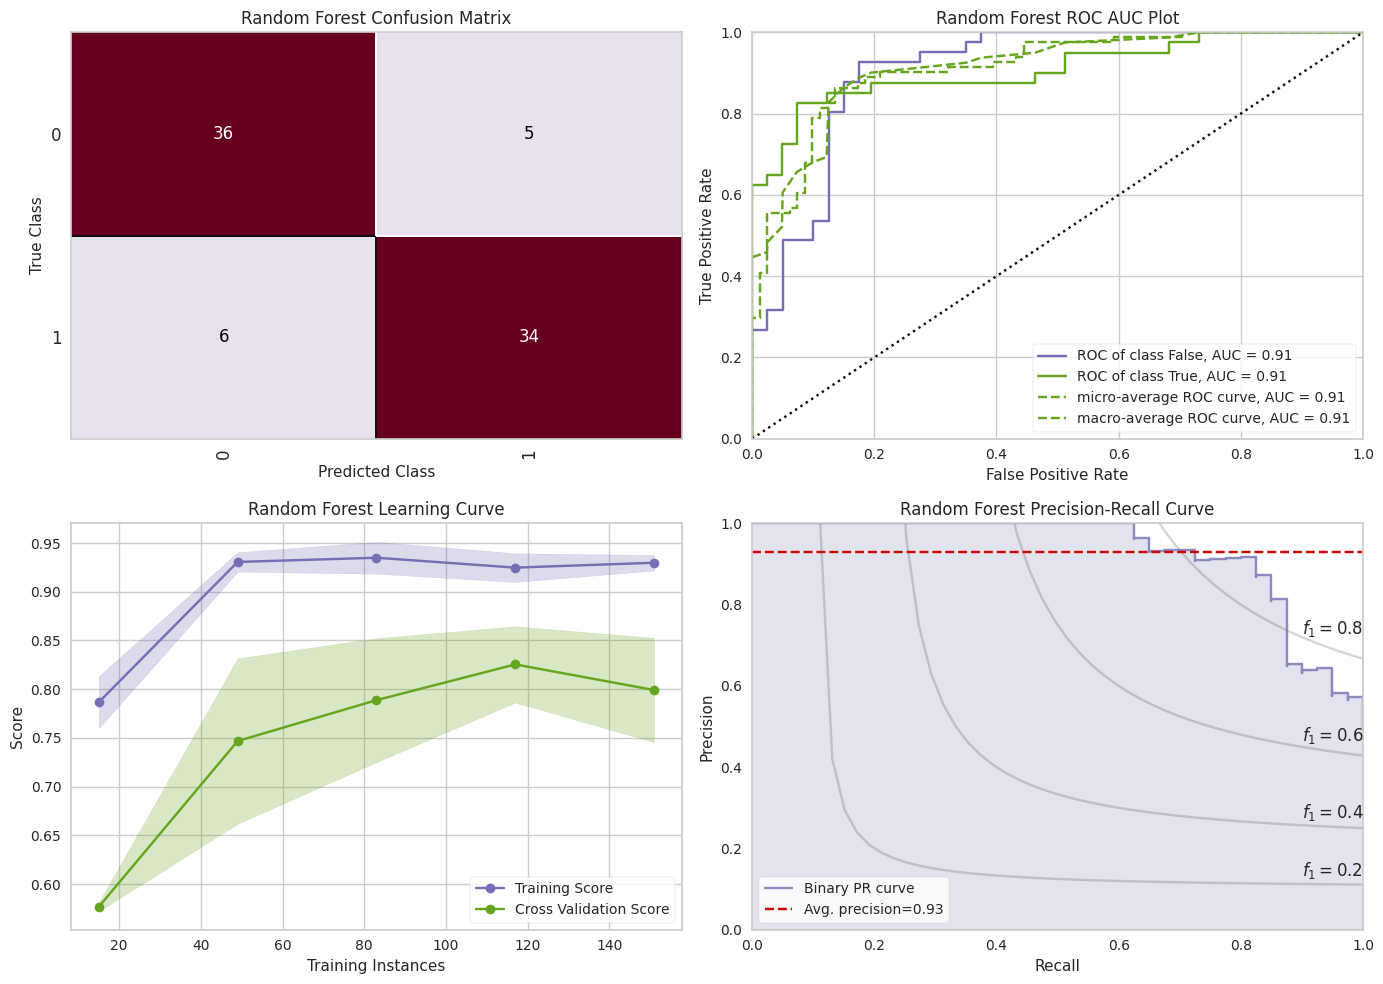

In [ ]:
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(x_train, y_train)
rcccurve.score(x_test, y_test)
rcccurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying Gradient Boosting ---
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential',
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)

.:. Gradient Boosting Accuracy: 80.25% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.80      0.80      0.80        40

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81


.: Performance Evaluation
**************************


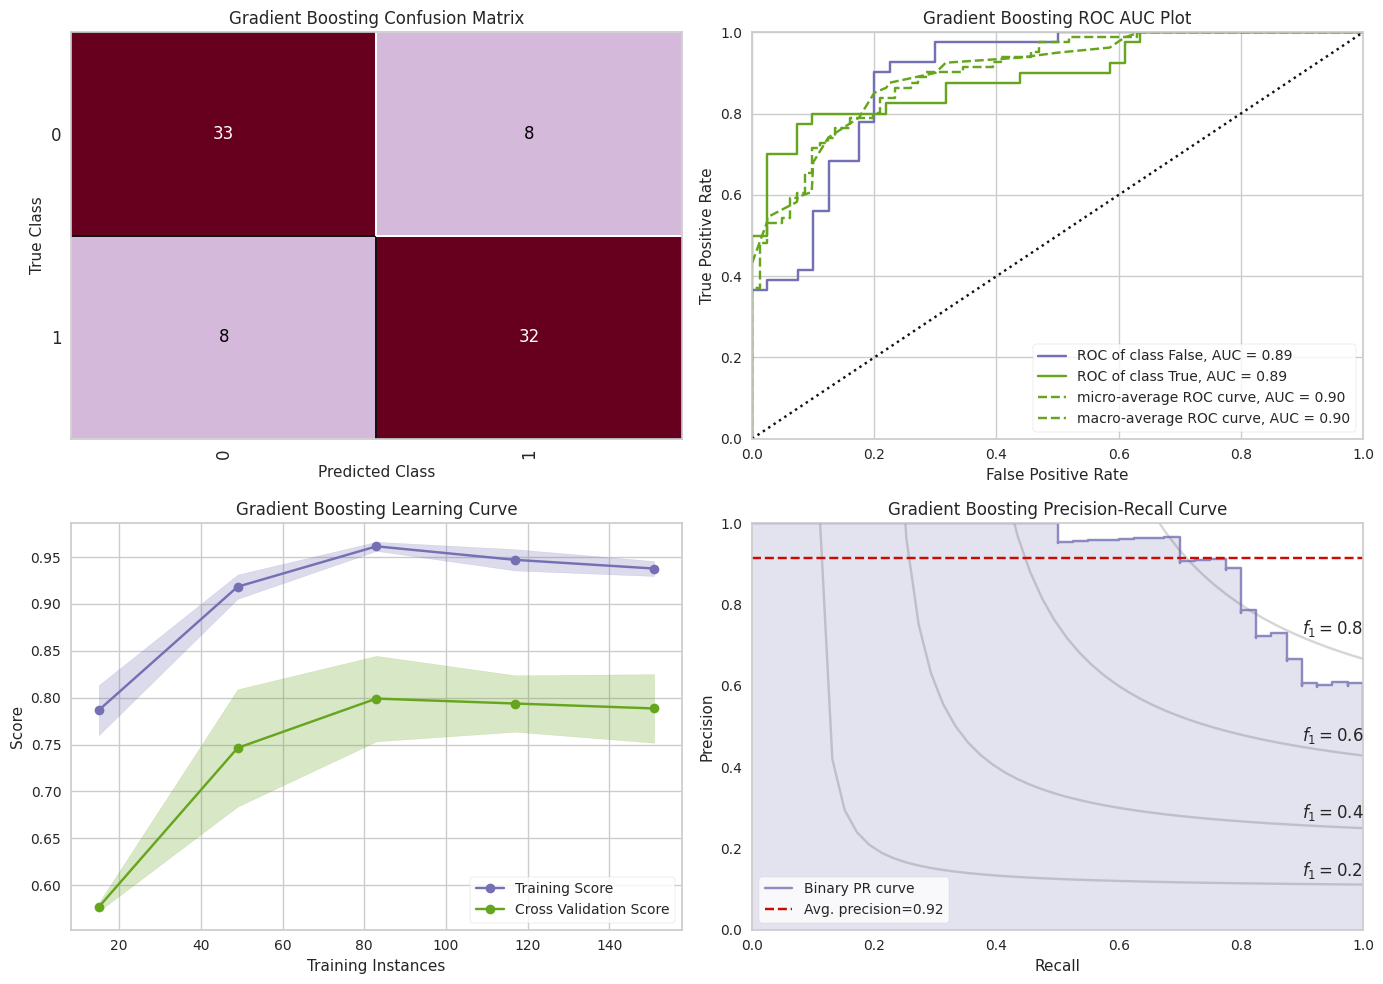

In [ ]:
# --- Gradient Boosting Accuracy ---
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

# --- Gradient Boosting Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_GB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(GBclassifier, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(GBclassifier, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(GBclassifier, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(GBclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();

In [ ]:
# --- Applying AdaBoost ---
ABclassifier = AdaBoostClassifier(n_estimators=3)

ABclassifier.fit(x_train, y_train)
y_pred_AB = ABclassifier.predict(x_test)

.:. AdaBoost Accuracy: 80.25% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.82      0.78      0.79        40

    accuracy                           0.80        81
   macro avg       0.80      0.80      0.80        81
weighted avg       0.80      0.80      0.80        81


.: Performance Evaluation
**************************


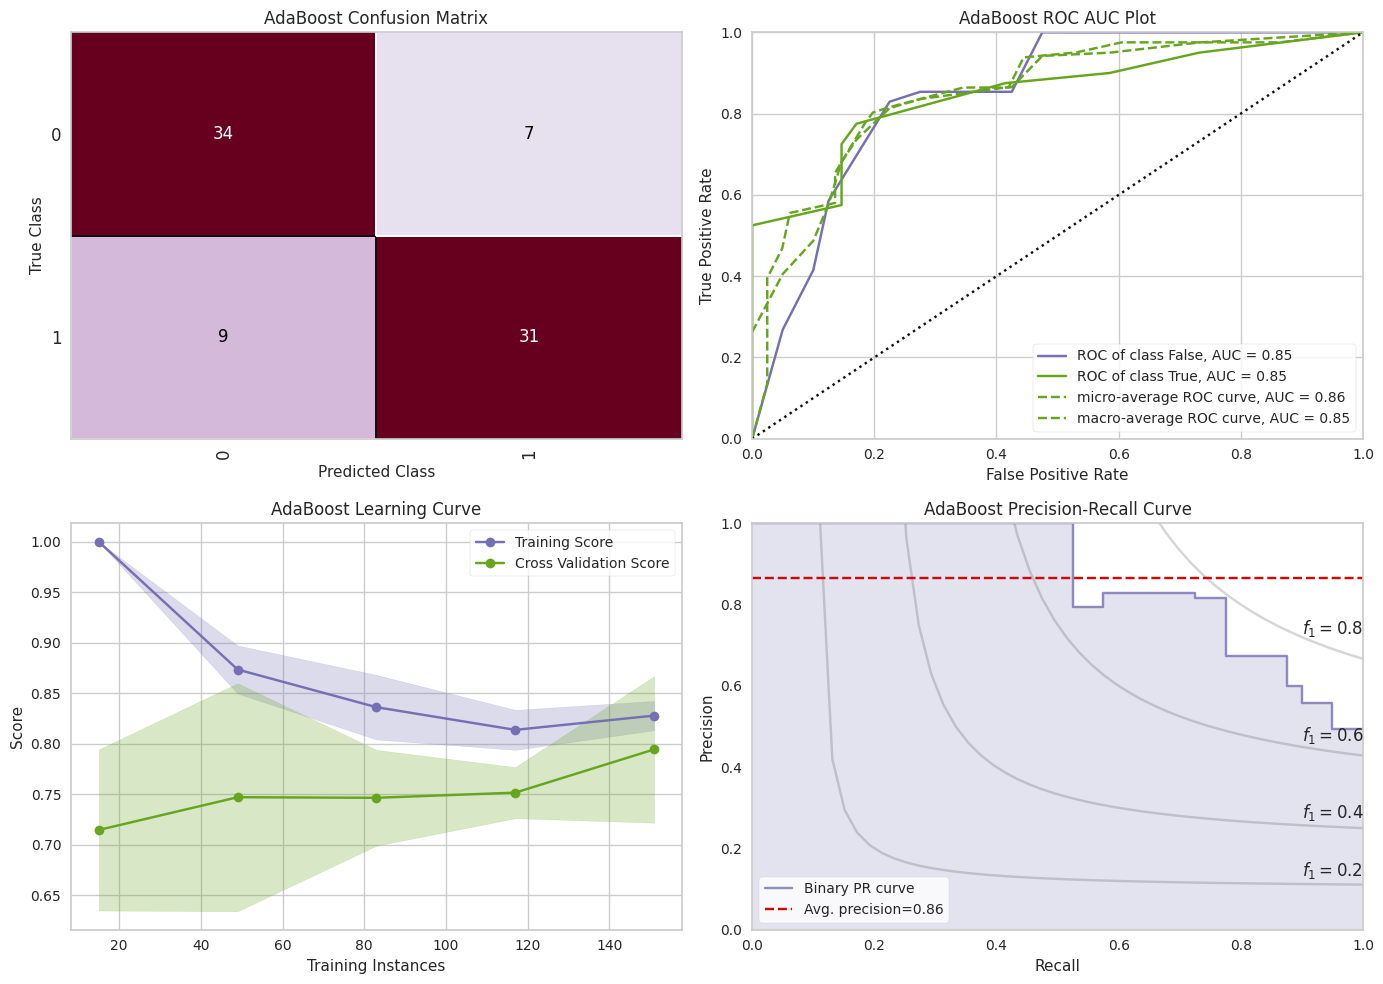

In [ ]:
# --- AdaBoost Accuracy ---
ABAcc = accuracy_score(y_pred_AB, y_test)
print('.:. AdaBoost Accuracy:'+'\033[1m {:.2f}%'.format(ABAcc*100)+' .:.')

# --- AdaBoost Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_AB))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- AdaBoost Confusion Matrix ---
abcmatrix = ConfusionMatrix(ABclassifier, ax=ax1, cmap='PuRd',
                            title='AdaBoost Confusion Matrix')
abcmatrix.fit(x_train, y_train)
abcmatrix.score(x_test, y_test)
abcmatrix.finalize()

# --- AdaBoost ROC AUC ---
abrocauc = ROCAUC(ABclassifier, classes=['False', 'True'], ax=ax2,
                  title='AdaBoost ROC AUC Plot')
abrocauc.fit(x_train, y_train)
abrocauc.score(x_test, y_test)
abrocauc.finalize()

# --- AdaBoost Learning Curve ---
ablc = LearningCurve(ABclassifier, ax=ax3, title='AdaBoost Learning Curve')
ablc.fit(x_train, y_train)
ablc.finalize()

# --- AdaBoost Precision Recall Curve ---
abpc = PrecisionRecallCurve(ABclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                            title='AdaBoost Precision-Recall Curve')
abpc.fit(x_train, y_train)
abpc.score(x_test, y_test)
abpc.finalize()

plt.tight_layout();

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine',
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting',
                                  'AdaBoost'],
                        'Accuracy': [LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTCAcc*100, RFAcc*100, GBAcc*100,
                                     ABAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})

<ipython-input-418-da30f763cca7>:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='GnBu').hide_index().set_properties(**{'font-family': 'Times New Roman'})


Model,Accuracy
Support Vector Machine,86.419753
Random Forest,86.419753
Gaussian Naive Bayes,85.185185
Logistic Regression,83.950617
Gradient Boosting,80.246914
AdaBoost,80.246914
K-Nearest Neighbour,74.074074
Decision Tree,71.604938
